In [78]:
import pandas as pd
import datetime
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt

In [55]:
## collect data
df = pd.read_csv('./bike_data.csv')

In [56]:
df

,date,n_rented_bikes,hour,temperature_celsius,humidity_pct,wind_speed_mps,visibility_10m,dew_point_temp_c,solar_radiation,rainfall_mm,snowfall_cm,season,is_holiday,is_functioning
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 8760 non-null   object 
 1   n_rented_bikes       8760 non-null   int64  
 2   hour                 8760 non-null   int64  
 3   temperature_celsius  8760 non-null   float64
 4   humidity_pct         8760 non-null   int64  
 5   wind_speed_mps       8760 non-null   float64
 6   visibility_10m       8760 non-null   int64  
 7   dew_point_temp_c     8760 non-null   float64
 8   solar_radiation      8760 non-null   float64
 9   rainfall_mm          8760 non-null   float64
 10  snowfall_cm          8760 non-null   float64
 11  season               8760 non-null   object 
 12  is_holiday           8760 non-null   object 
 13  is_functioning       8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ KB


In [58]:
## for numerical columns
df.describe()

,n_rented_bikes,hour,temperature_celsius,humidity_pct,wind_speed_mps,visibility_10m,dew_point_temp_c,solar_radiation,rainfall_mm,snowfall_cm
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### Data cleaning

In [59]:
## change date format 
#df['date'] = pd.to_datetime(df['date'], dayfirst= True)
df['date'] = pd.to_datetime(df['date'], format= '%d/%m/%Y')

In [60]:
df['date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: date, Length: 8760, dtype: datetime64[ns]

In [61]:
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit= 'h')

In [62]:
df

,date,n_rented_bikes,hour,temperature_celsius,humidity_pct,wind_speed_mps,visibility_10m,dew_point_temp_c,solar_radiation,rainfall_mm,snowfall_cm,season,is_holiday,is_functioning,datetime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 19:00:00
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 20:00:00
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 21:00:00
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 22:00:00


In [63]:
## change is_hodilday and is_functioning to boolian
df['is_holiday'] = df['is_holiday'].apply(lambda x: True if x == 'No_Holiday' else False)

In [64]:
df['is_holiday']

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: is_holiday, Length: 8760, dtype: bool

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 8760 non-null   datetime64[ns]
 1   n_rented_bikes       8760 non-null   int64         
 2   hour                 8760 non-null   int64         
 3   temperature_celsius  8760 non-null   float64       
 4   humidity_pct         8760 non-null   int64         
 5   wind_speed_mps       8760 non-null   float64       
 6   visibility_10m       8760 non-null   int64         
 7   dew_point_temp_c     8760 non-null   float64       
 8   solar_radiation      8760 non-null   float64       
 9   rainfall_mm          8760 non-null   float64       
 10  snowfall_cm          8760 non-null   float64       
 11  season               8760 non-null   object        
 12  is_holiday           8760 non-null   bool          
 13  is_functioning       8760 non-nul

In [66]:
## change is_functioning
df['is_functioning'] = df['is_functioning'].apply(lambda x: True if x == 'Yes' else False)

In [67]:
df['is_functioning']

0       True
1       True
2       True
3       True
4       True
        ... 
8755    True
8756    True
8757    True
8758    True
8759    True
Name: is_functioning, Length: 8760, dtype: bool

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 8760 non-null   datetime64[ns]
 1   n_rented_bikes       8760 non-null   int64         
 2   hour                 8760 non-null   int64         
 3   temperature_celsius  8760 non-null   float64       
 4   humidity_pct         8760 non-null   int64         
 5   wind_speed_mps       8760 non-null   float64       
 6   visibility_10m       8760 non-null   int64         
 7   dew_point_temp_c     8760 non-null   float64       
 8   solar_radiation      8760 non-null   float64       
 9   rainfall_mm          8760 non-null   float64       
 10  snowfall_cm          8760 non-null   float64       
 11  season               8760 non-null   object        
 12  is_holiday           8760 non-null   bool          
 13  is_functioning       8760 non-nul

In [69]:
df

,date,n_rented_bikes,hour,temperature_celsius,humidity_pct,wind_speed_mps,visibility_10m,dew_point_temp_c,solar_radiation,rainfall_mm,snowfall_cm,season,is_holiday,is_functioning,datetime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,False,True,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,False,True,2018-11-30 19:00:00
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,False,True,2018-11-30 20:00:00
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,False,True,2018-11-30 21:00:00
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,False,True,2018-11-30 22:00:00


In [70]:
## df['is_functioning'] = df['is_functioning'].astype(bool)    or this method

In [71]:
df = df.query('is_functioning')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 8465 non-null   datetime64[ns]
 1   n_rented_bikes       8465 non-null   int64         
 2   hour                 8465 non-null   int64         
 3   temperature_celsius  8465 non-null   float64       
 4   humidity_pct         8465 non-null   int64         
 5   wind_speed_mps       8465 non-null   float64       
 6   visibility_10m       8465 non-null   int64         
 7   dew_point_temp_c     8465 non-null   float64       
 8   solar_radiation      8465 non-null   float64       
 9   rainfall_mm          8465 non-null   float64       
 10  snowfall_cm          8465 non-null   float64       
 11  season               8465 non-null   object        
 12  is_holiday           8465 non-null   bool          
 13  is_functioning       8465 non-null   b

In [73]:
df.shape

(8465, 15)

In [75]:
df.count()

date                   8465
n_rented_bikes         8465
hour                   8465
temperature_celsius    8465
humidity_pct           8465
wind_speed_mps         8465
visibility_10m         8465
dew_point_temp_c       8465
solar_radiation        8465
rainfall_mm            8465
snowfall_cm            8465
season                 8465
is_holiday             8465
is_functioning         8465
datetime               8465
dtype: int64

In [77]:
df.isna().sum()

date                   0
n_rented_bikes         0
hour                   0
temperature_celsius    0
humidity_pct           0
wind_speed_mps         0
visibility_10m         0
dew_point_temp_c       0
solar_radiation        0
rainfall_mm            0
snowfall_cm            0
season                 0
is_holiday             0
is_functioning         0
datetime               0
dtype: int64

#### Visualisation

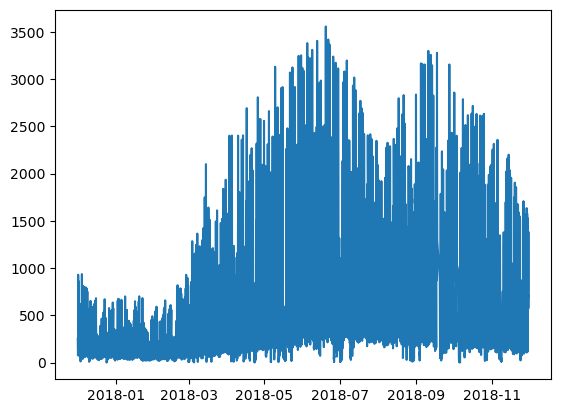

In [79]:
## rental bikes vs datetime
y = df['n_rented_bikes']
x = df['datetime']

plt.plot(x, y)

plt.show()

#### We can plot better using the plotly function

In [88]:
## using px
y = df['n_rented_bikes']
x = df['datetime']

fig = px.line(x= x, y= y)


fig.show()


In [87]:
## calculating the total number of rented bikes per day
by_day = df.groupby('date', as_index= False).agg({'n_rented_bikes': 'sum'})

px.line(by_day, x= 'date', y= 'n_rented_bikes')

In [86]:
## copy the previous chain of manipulations and add season as a variable to group
by_day_season = df.groupby(['date', 'season'], as_index= False).agg({'n_rented_bikes': 'sum'})

px.line(by_day_season, x= 'date', y= 'n_rented_bikes', color= 'season')

#### Explore the relation between weather and rental

In [90]:
## query df to only keep observations at noon
noon_rides = df.query('hour == 12')

## create a scatter plot showing temp against number of 

px.scatter(noon_rides, x= 'temperature_celsius', y= 'n_rented_bikes')

In [93]:
## check relation between n_rented and and visibility_10m


px.scatter(df, x= 'visibility_10m', y= 'n_rented_bikes')

In [103]:
'''
plt.scatter(df['visibility_10m'], df['n_rented_bikes'], cmap= True)
plt.title('Visibility vs n_rented_bikes')
plt.xlabel('Visibility')
plt.ylabel('n Rented bikes')


plt.legend()
plt.show() 

'''

"\nplt.scatter(df['visibility_10m'], df['n_rented_bikes'], cmap= True)\nplt.title('Visibility vs n_rented_bikes')\nplt.xlabel('Visibility')\nplt.ylabel('n Rented bikes')\n\n\nplt.legend()\nplt.show() \n\n"

#### Explore typical daily usage pattern

In [105]:
## ave number of rented per hr
time_of_day = df.groupby('hour', as_index= False).agg({'n_rented_bikes': 'mean'})

## create a bar chart 
px.bar(time_of_day, x= 'hour', y= 'n_rented_bikes')

In [107]:
## query for season
time_of_day_season = df.groupby(['hour', 'season'], as_index= False).agg({'n_rented_bikes': 'mean'})

px.bar(time_of_day_season, x= 'hour', y= 'n_rented_bikes', color= 'season', facet_col= 'season')

In [109]:
## check if New Year's Eve is Different
new_year_start = datetime(2017, 12, 31, 12)
new_years_end = datetime(2018, 1, 1, 12)

new_year = df.query('@new_year_start <= datetime  <= @new_years_end')



## create dataframe with new years data



## show the usage pattern
px.bar(new_year, x= 'datetime', y= 'n_rented_bikes')